#Getting Started with PySpark in Google Colab

PySpark is Python interface for Apache Spark. The primary use cases for PySpark are to work with huge amounts of data and for creating data pipelines.

You don't need to work with big data to benefit from PySpark. I find that the SparkSQL is a great tool for performing routine data anlysis. Pandas can get slow and you may find yourself writing a lot of code for data cleaning whereas the same actions take much less code in SQL. Let's get started!

See more here! http://spark.apache.org/docs/latest/api/python/

# 1. Installing PySpark in Google Colab

In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,309 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,617 kB]
Get:13 https://ppa.launchpadcontent.net/c2d4u.team/c2

In [ ]:
spark

NameError: name 'spark' is not defined

# 2. Reading Data

For this example, I am going to use a publicly available data set in a CSV format.

In [2]:
import requests
path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
req = requests.get(path)
url_content = req.content

csv_file_name = 'owid-covid-data.csv'
csv_file = open(csv_file_name, 'wb')

csv_file.write(url_content)
csv_file.close()

df = spark.read.csv('/content/'+csv_file_name, header=True, inferSchema=True)
df.show()

+--------+---------+-----------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+--------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+-------------------------------------+------------------------------+-------------------------------

In [3]:
import requests
# URL do conjunto de dados Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Baixar o conjunto de dados Titanic
req = requests.get(url)
csv_content = req.content

# Salvar o conteúdo em um arquivo CSV
csv_file_name = 'titanic.csv'
with open(csv_file_name, 'wb') as csv_file:
    csv_file.write(csv_content)

# Ler o DataFrame do arquivo CSV
df_titanic = spark.read.csv('/content/'+csv_file_name, sep=",", header=True, inferSchema=True)

# Exibir o DataFrame
df_titanic.show()
df_titanic_pandas = df_titanic.toPandas()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()
cols = [i.replace('(cm)','').strip().replace(' ','_') for i in data.feature_names] + ['label'] # Column name cleanup
pdf = pd.DataFrame(np.c_[data.data, data.target], columns=cols)
df_iris = spark.createDataFrame(pdf)
df_iris.show()

+------------+-----------+------------+-----------+-----+
|sepal_length|sepal_width|petal_length|petal_width|label|
+------------+-----------+------------+-----------+-----+
|         5.1|        3.5|         1.4|        0.2|  0.0|
|         4.9|        3.0|         1.4|        0.2|  0.0|
|         4.7|        3.2|         1.3|        0.2|  0.0|
|         4.6|        3.1|         1.5|        0.2|  0.0|
|         5.0|        3.6|         1.4|        0.2|  0.0|
|         5.4|        3.9|         1.7|        0.4|  0.0|
|         4.6|        3.4|         1.4|        0.3|  0.0|
|         5.0|        3.4|         1.5|        0.2|  0.0|
|         4.4|        2.9|         1.4|        0.2|  0.0|
|         4.9|        3.1|         1.5|        0.1|  0.0|
|         5.4|        3.7|         1.5|        0.2|  0.0|
|         4.8|        3.4|         1.6|        0.2|  0.0|
|         4.8|        3.0|         1.4|        0.1|  0.0|
|         4.3|        3.0|         1.1|        0.1|  0.0|
|         5.8|

## EDA Libs

In [ ]:
!pip install ydata_profiling

In [15]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport


df = pd.read_csv("movie-counts.csv", encoding="latin-1")

In [16]:
df

movie_name  release_year  \
0                  Star Wars: Episode IV - A New Hope          1977   
1                                    The Wizard of Oz          1939   
2                                       The Godfather          1972   
3      Star Wars: Episode V - The Empire Strikes Back          1980   
4                                                Jaws          1975   
...                                               ...           ...   
29041                            Ìädouard et Caroline          1951   
29042                           Ìätoile sans lumiÌ¬re          1946   
29043                            ÌÒsmy dzien tygodnia          1958   
29044                           ÌÓsaka-jÌ« monogatari          1961   
29045                             ÌÓsone-ke no ashita          1946   

       oscars_year ceremony result  count  overall_rank  year_rank  \
0             1977     50th      N   4965             1          1   
1             1939     12th      N   3291             2          1   
2             1972     45th      W   1767             3          1   
3             1980      NaN    NaN   1748             4          1   
4             1975     48th      N   1570             5          1   
...            ...      ...    ...    ...           ...        ...   
29041         1952      NaN    NaN      1         29042        259   
29042         1947      NaN    NaN      1         29043        239   
29043         1959      NaN    NaN      1         29044        217   
29044         1961      NaN    NaN      1         29045        217   
29045         1946      NaN    NaN      1         29046        247   

       annual_share  
0          0.551789  
1          0.503442  
2          0.336957  
3          0.201615  
4          0.313123  
...             ...  
29041      0.000529  
29042      0.000891  
29043      0.000342  
29044      0.000331  
29045      0.000409  

[29046 rows x 9 columns]

In [17]:
profile = ProfileReport(df, title="Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install dtale

In [21]:
import pandas as pd
import dtale

df1 = pd.read_csv("movie-counts.csv", encoding="latin-1")

dtale.show(df1)

In [ ]:
!pip install sweetviz

In [20]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
#create a dataframe
# df1 = pd.DataFrame(columns=['A', 'B', 'C'], data=[[1,2,3],[4,5,6],[7,8,9]])
df2 = pd.read_csv("movie-counts.csv", encoding='latin-1')
#change name of columns count
df2.rename(columns={'count':'movie_count'}, inplace=True)

report = sv.analyze(df2)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



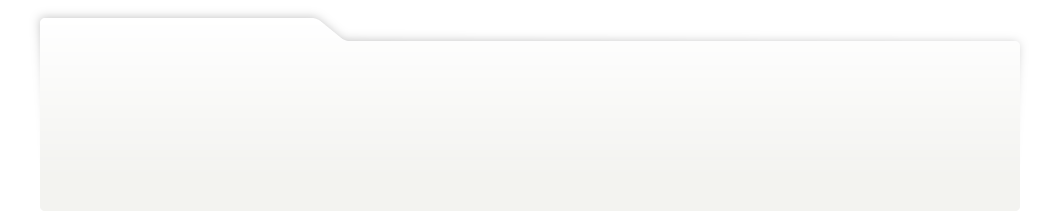
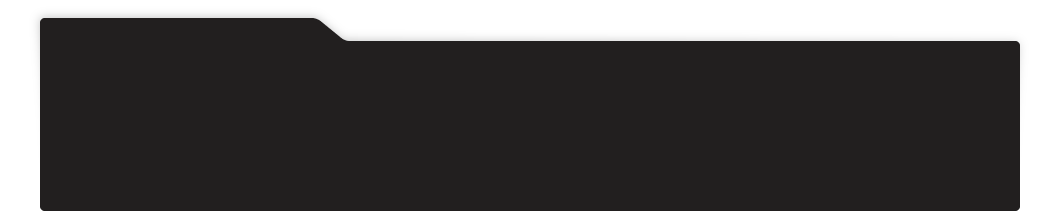
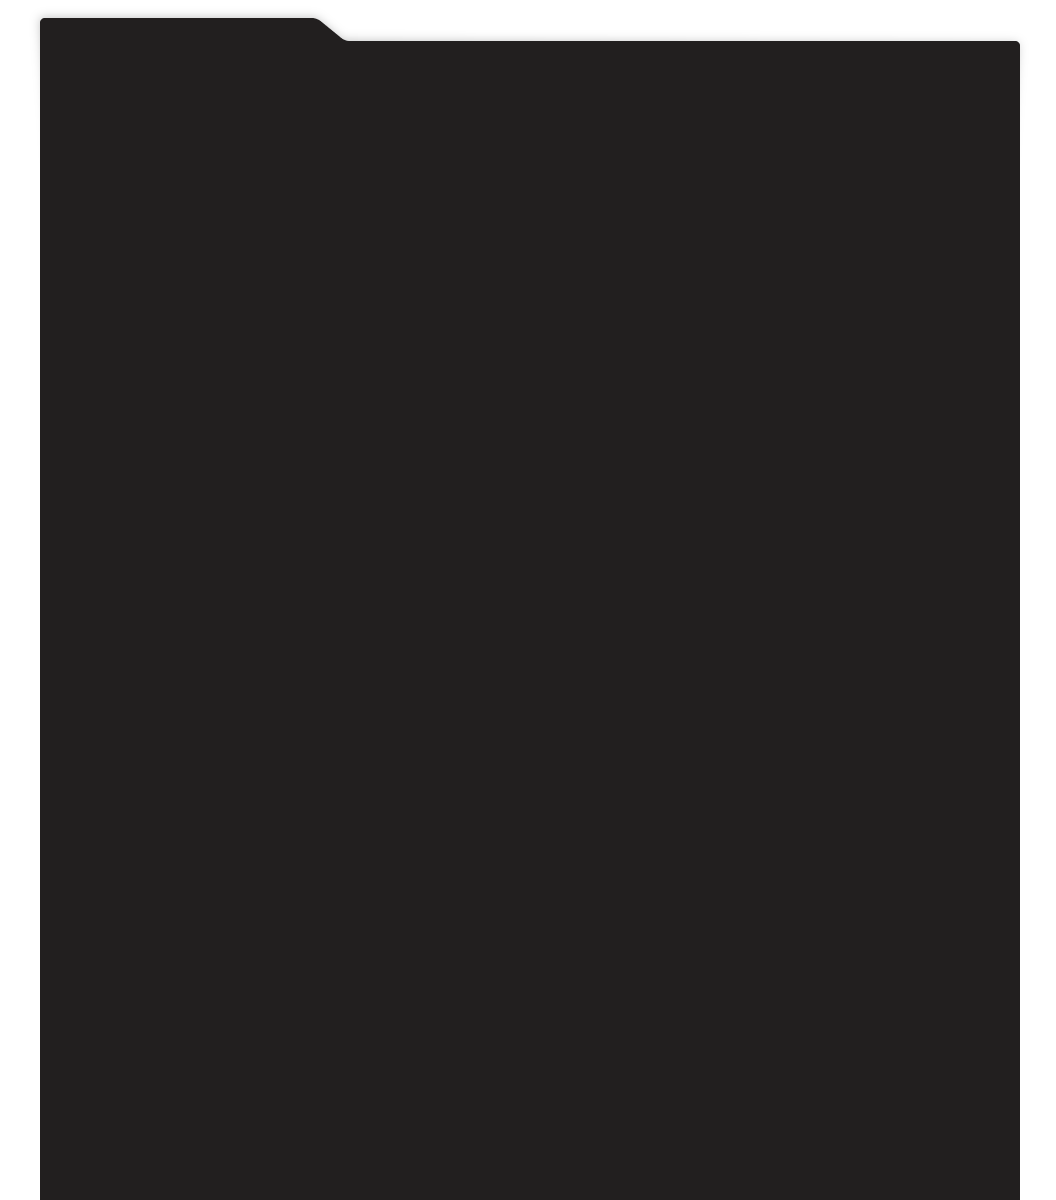
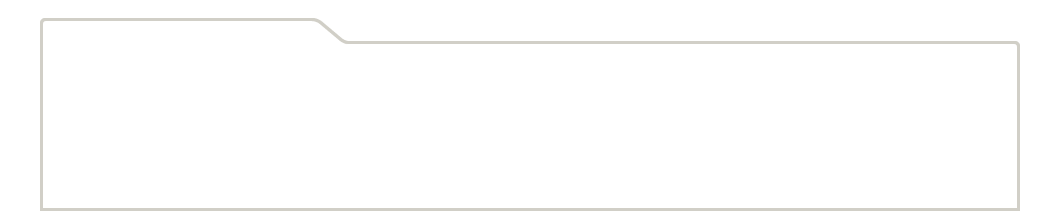
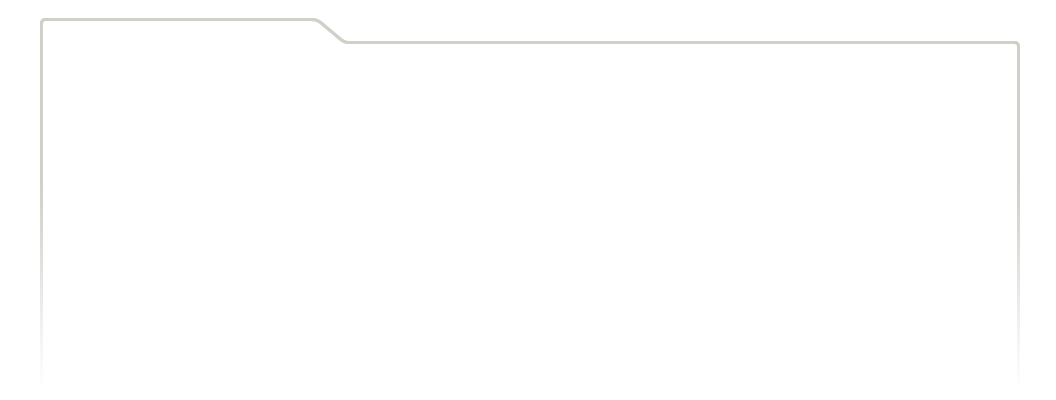
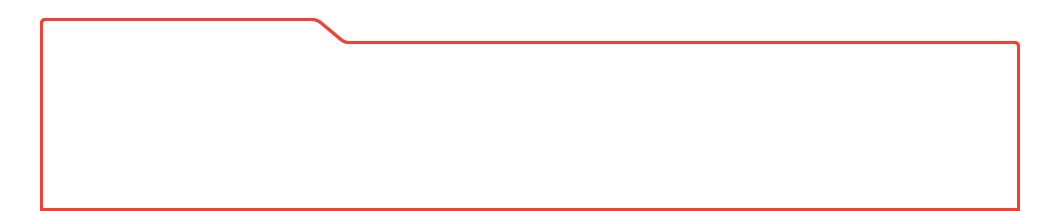
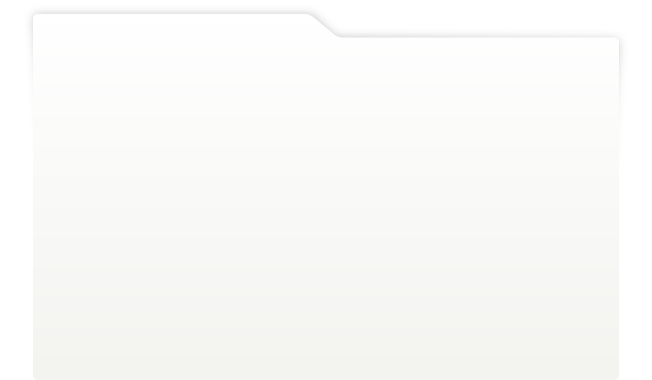
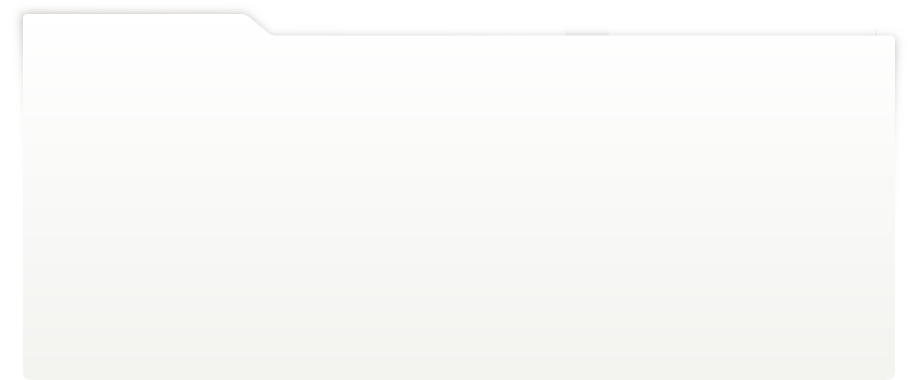
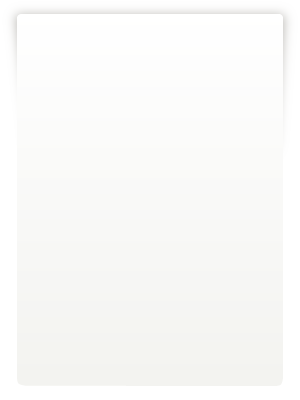
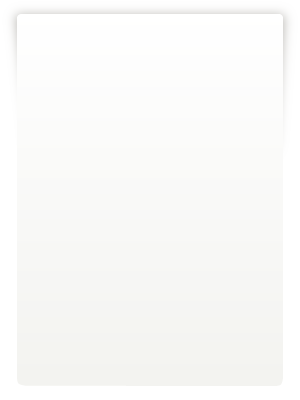
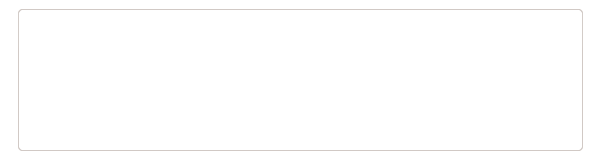
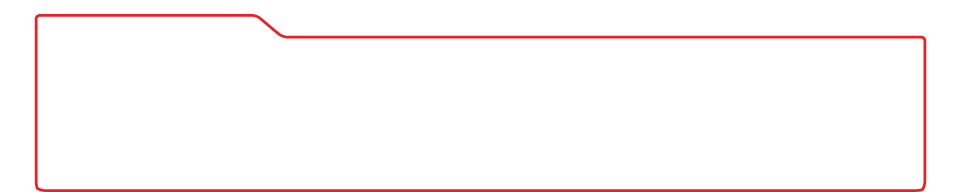
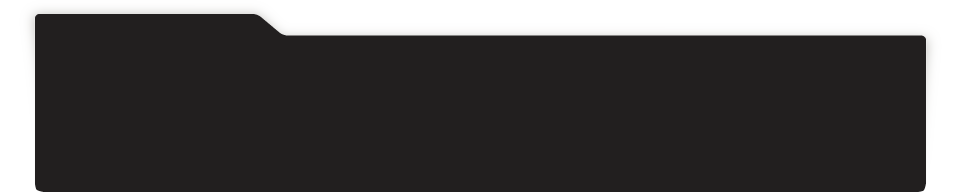
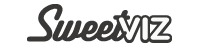
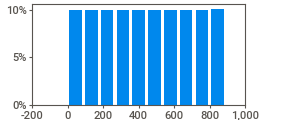
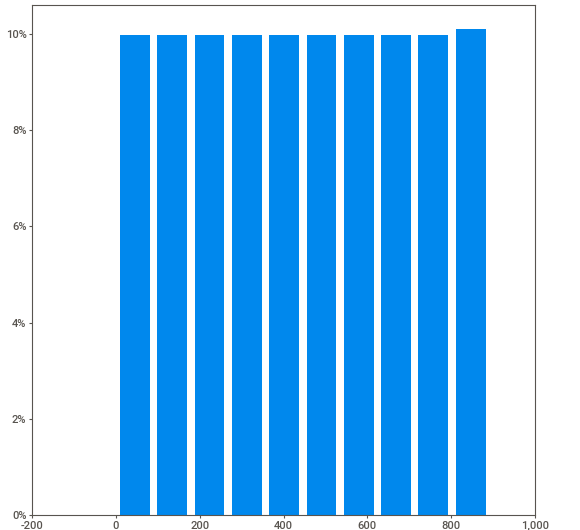
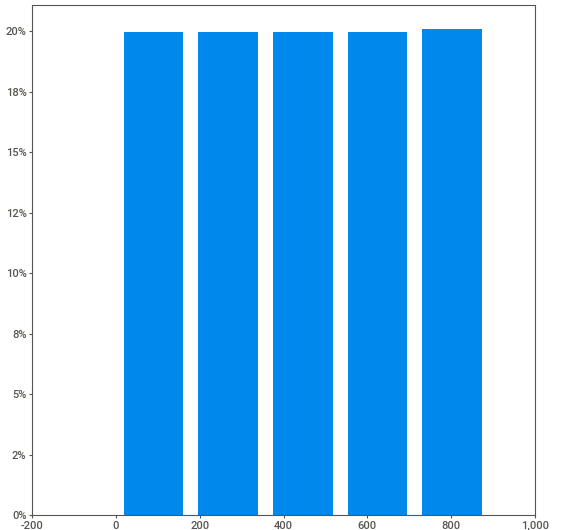
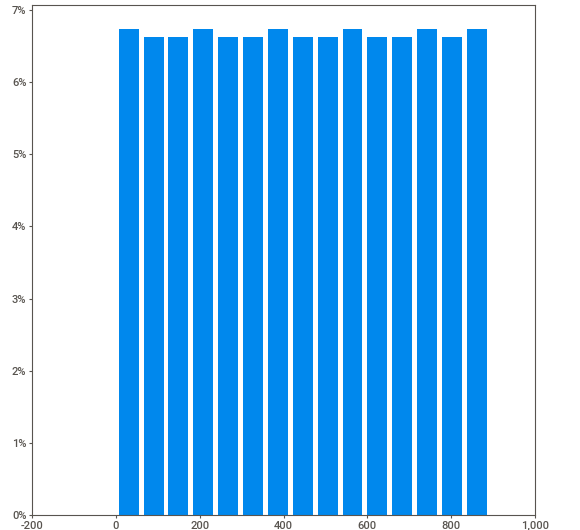
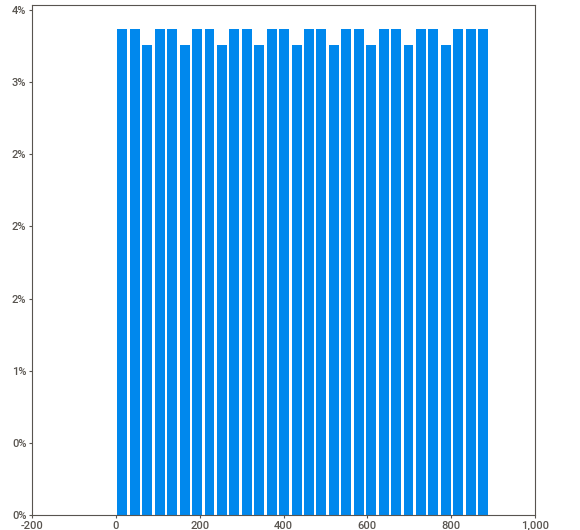
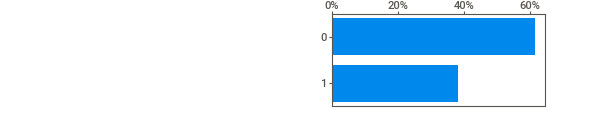
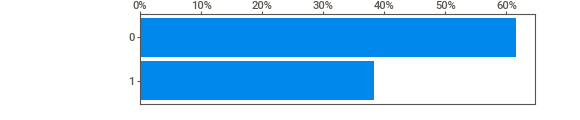
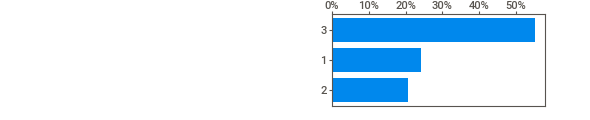
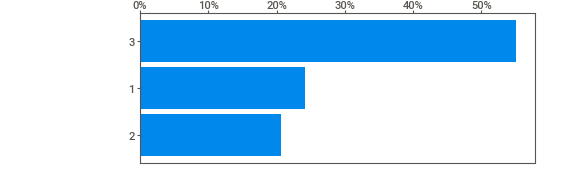
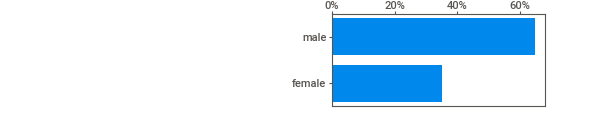
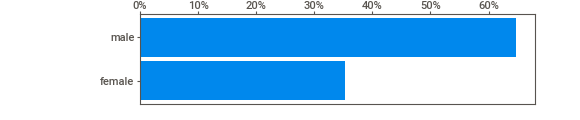
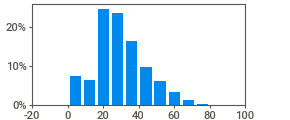
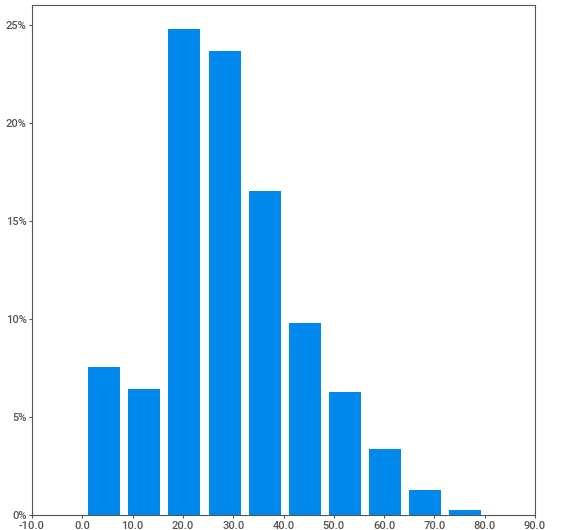
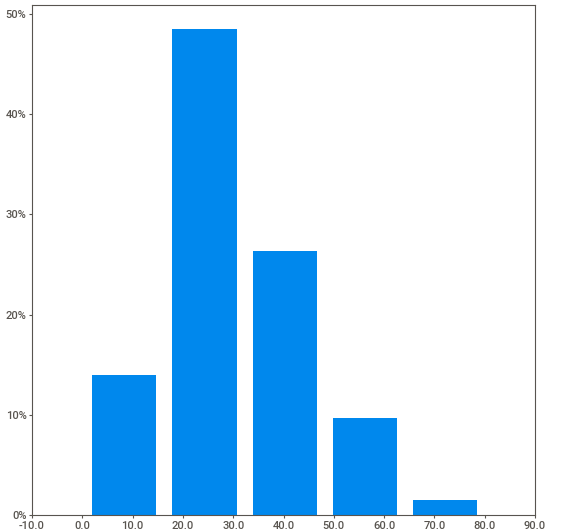
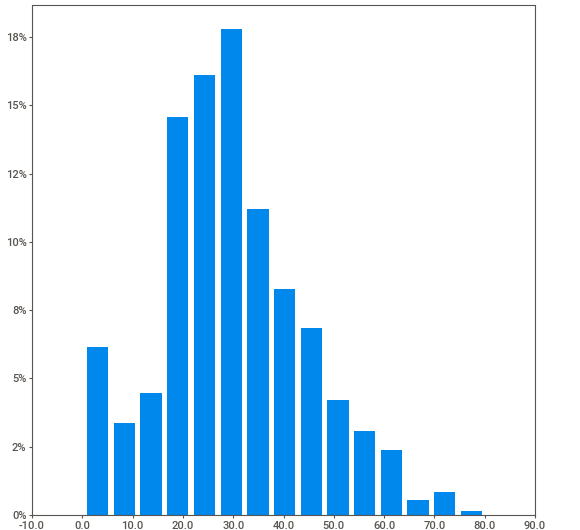
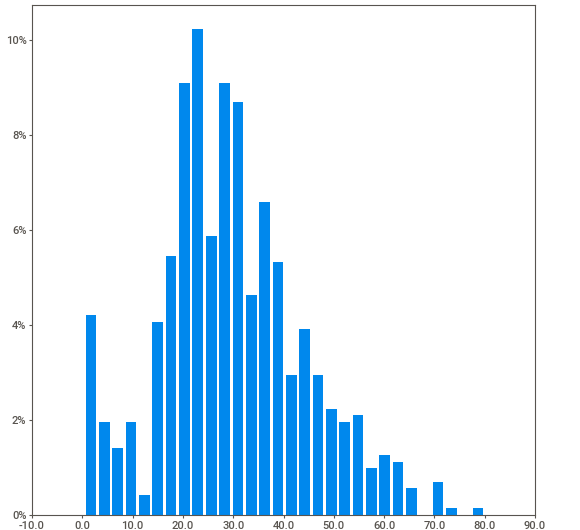
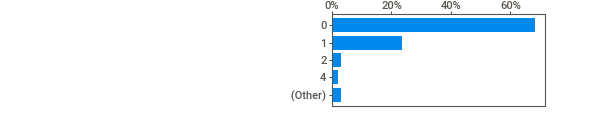
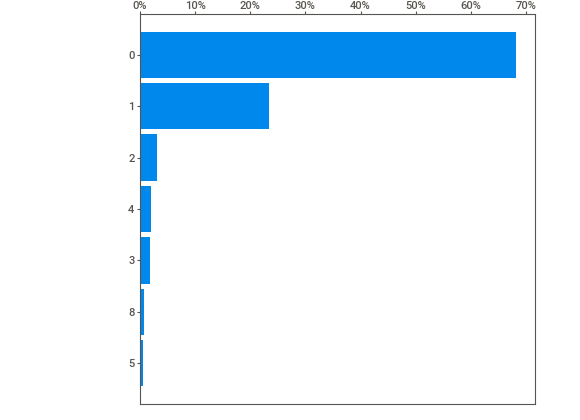
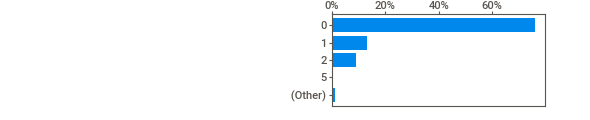
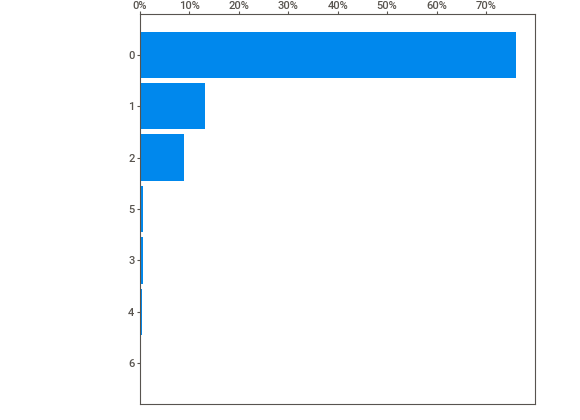
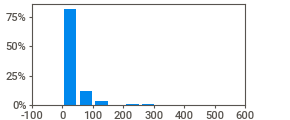
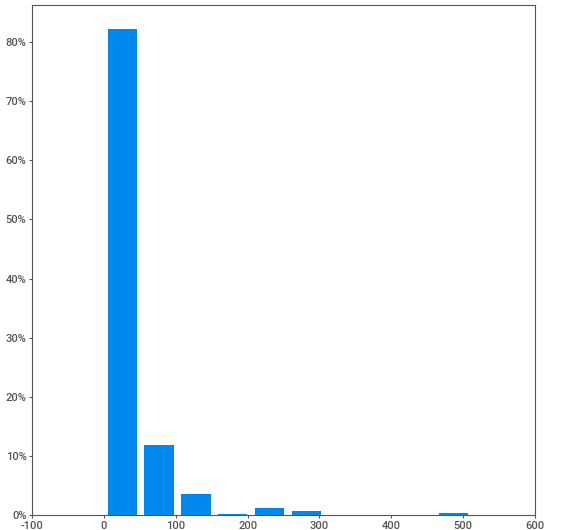
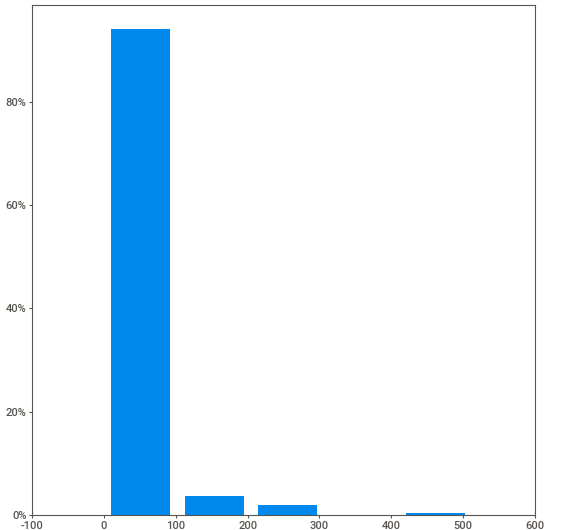
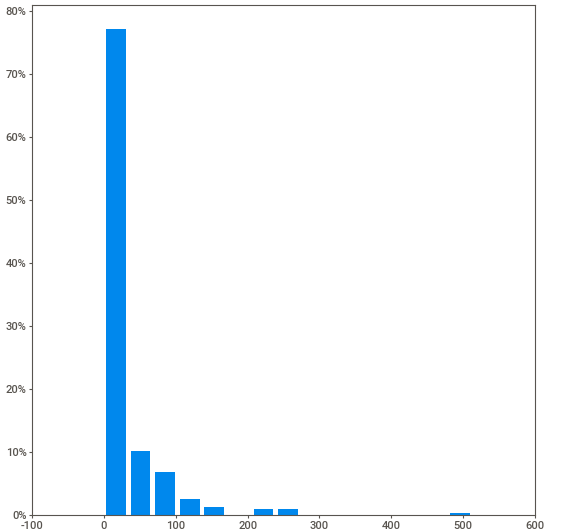
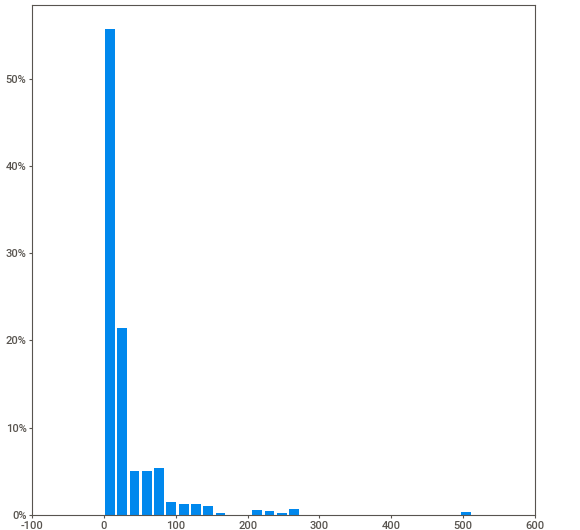
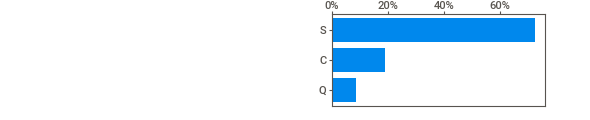
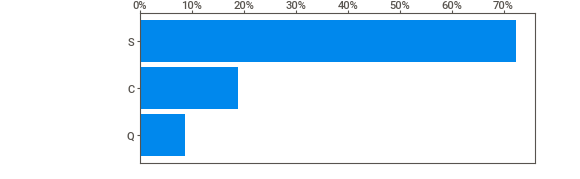
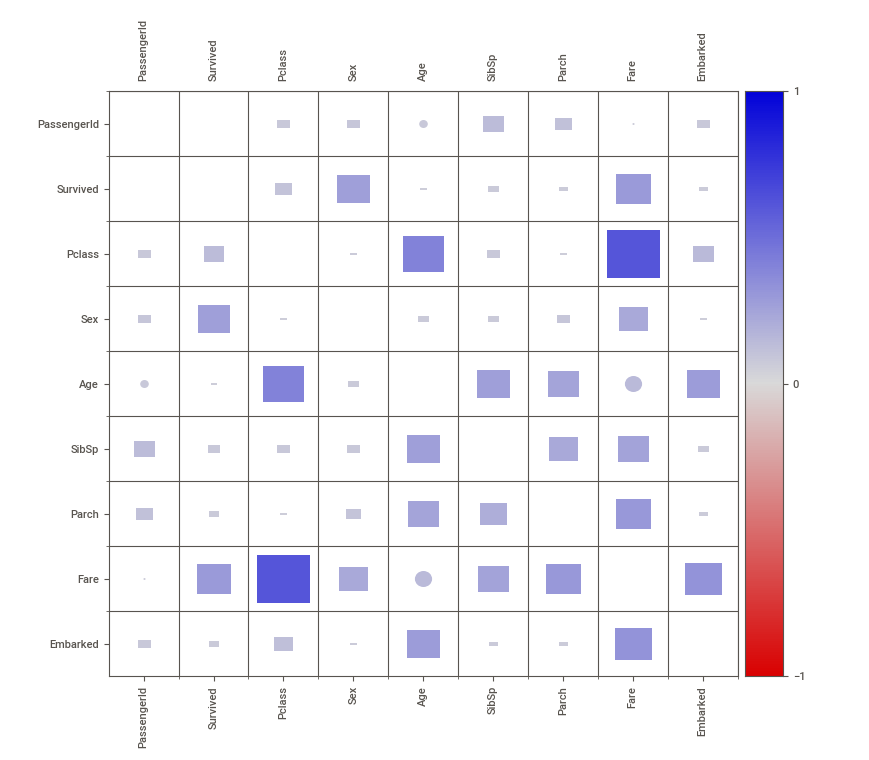
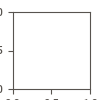

In [16]:
import IPython
IPython.display.HTML(filename='/content/SWEETVIZ_REPORT.html')

In [ ]:
!pip install lux-api

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
import streamlit.components.v1 as components
import pandas as pd
import lux

def app():
    st.title('Analysis of Movie Dataset')
    st.write('Check out these cool visualizations!')
    df = pd.read_csv("movie-counts.csv", encoding='latin-1')
    export_file = 'movie.html'
    df.save_as_html(export_file)
    html = open(export_file, 'r').read()
    components.html(html, width=800, height=350)

app()

In [ ]:
import streamlit as st
import streamlit.components.v1 as components
import pandas as pd
import lux

def app():
    st.title('Analysis of Movies Dataset')
    st.write('Check out these cool visualizations!')
    df2 = pd.read_csv("https://github.com/TheEconomist/graphic-detail-data/blob/master/data/2019-03-02_oscars-influence/movie-counts.csv")
    export_file = 'movies.html'
    df2.save_as_html(export_file)
    html = open(export_file, 'r').read()
    components.html(html, width=800, height=350)

app()

In [ ]:
import pandas as pd
import lux
#Vis object for individual visualization
from lux.vis.Vis import Vis
# Vis object for vis collection visualization
from lux.vis.VisList import VisList

df2 = pd.read_csv("https://raw.githubusercontent.com/lux-org/lux-datasets/master/data/hpi.csv")

df2

In [41]:
from google.colab import output
output.enable_custom_widget_manager()

#3. PySpark DataFrames

In [ ]:
#Viewing the dataframe schema
df.printSchema()

root
 |-- iso_code: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: date (nullable = true)
 |-- total_cases: double (nullable = true)
 |-- new_cases: double (nullable = true)
 |-- new_cases_smoothed: double (nullable = true)
 |-- total_deaths: double (nullable = true)
 |-- new_deaths: double (nullable = true)
 |-- new_deaths_smoothed: double (nullable = true)
 |-- total_cases_per_million: double (nullable = true)
 |-- new_cases_per_million: double (nullable = true)
 |-- new_cases_smoothed_per_million: double (nullable = true)
 |-- total_deaths_per_million: double (nullable = true)
 |-- new_deaths_per_million: double (nullable = true)
 |-- new_deaths_smoothed_per_million: double (nullable = true)
 |-- reproduction_rate: double (nullable = true)
 |-- icu_patients: double (nullable = true)
 |-- icu_patients_per_million: double (nullable = true)
 |-- hosp_patients: double (nullable = true)
 |-- hosp_patients_per_million: 

In [ ]:
df_iris.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- label: double (nullable = true)



In [ ]:
type(df_iris)

pyspark.sql.dataframe.DataFrame

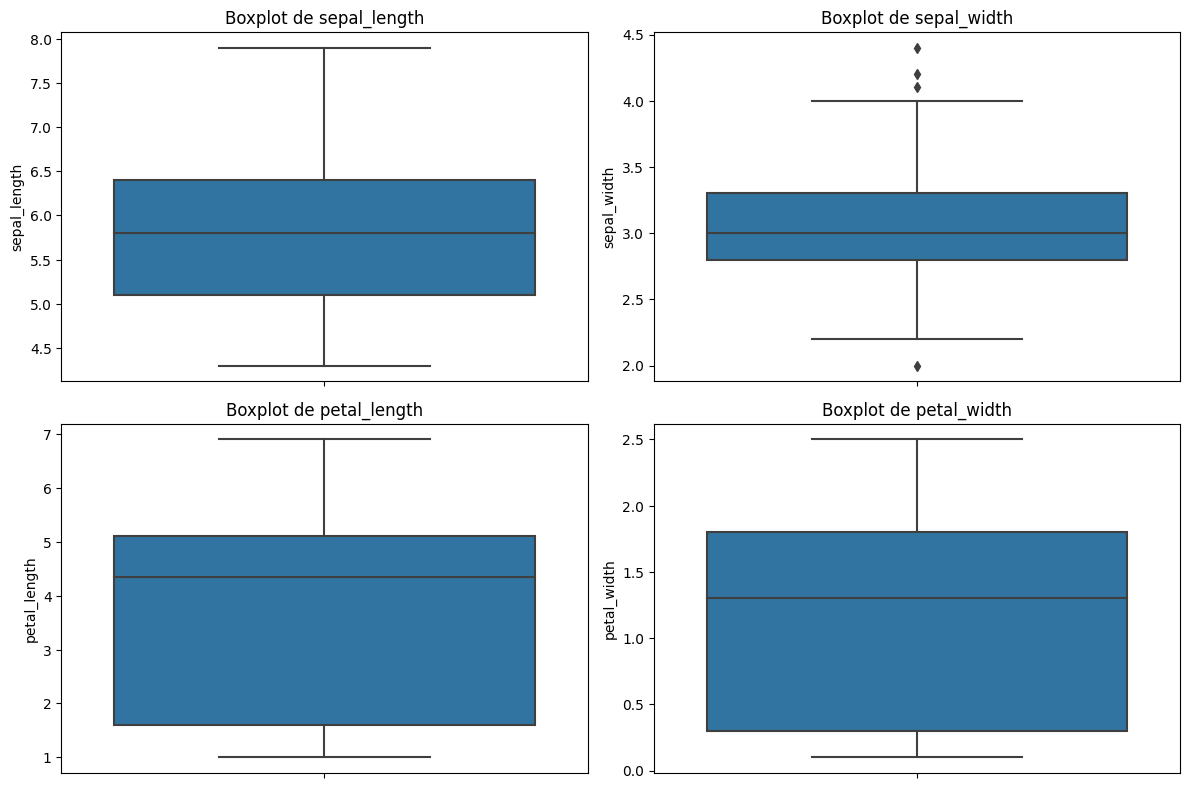

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


# Converter o DataFrame PySpark para Pandas
df_iris_pandas = df_iris.toPandas()

# Criar um boxplot para cada coluna numérica
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_iris_pandas.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_iris_pandas[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

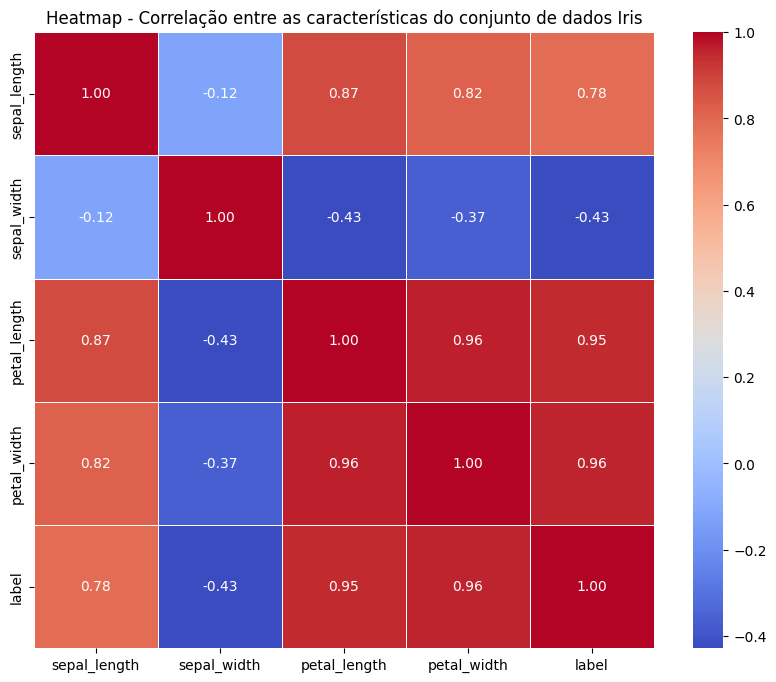

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Converter o DataFrame PySpark para Pandas
df_iris_pandas = df_iris.toPandas()

# Criar um heatmap usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_iris_pandas.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Heatmap - Correlação entre as características do conjunto de dados Iris")
plt.show()

In [ ]:
# prompt: poderia contar o numero de linhas e colunas do df pyspark

# Contar o número de linhas
num_linhas = df.count()

# Contar o número de colunas
num_colunas = len(df.columns)

# Exibir resultados
print(f"Número de Linhas: {num_linhas}")
print(f"Número de Colunas: {num_colunas}")


Número de Linhas: 276130
Número de Colunas: 67


In [ ]:
# prompt: trazer os dados do brazil em location

df.filter(df['location'] == 'Brazil').show()


+--------+-------------+--------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+--------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+-------------------------------------+------------------------------+------------------------------

In [ ]:
# prompt: trazer o valor total de total_deaths do brazil
from pyspark.sql.functions import sum, col

# Filtrar o DataFrame para incluir apenas as linhas do Brasil
df_brazil = df.filter(df['location'] == 'Brazil')

# Calcular o total de mortes para o Brasil
total_deaths_brazil = df_brazil.select(sum(col('total_deaths').cast('int'))).collect()[0][0]
# Exibir o resultado
print(f"Total de Mortes no Brasil: {total_deaths_brazil}")


Total de Mortes no Brasil: 99626718


In [ ]:
df_brazil.summary().show()

+-------+--------+-------------+--------+--------------------+------------------+------------------+------------------+-----------------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-------------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+--------------------+------------------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+---------------+--------------------+--------------------+-----------------------+-------------------+-----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+------------------------------------

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
#Converting a date column
df.select(F.to_date(df.date).alias('date'))

DataFrame[date: date]

In [ ]:
#Summary stats
df.describe().show()

+-------+--------+-------------+-----------+----------+--------------------+-----------------+------------------+------------------+-----------------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-------------------+------------------+------------------------+------------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+------------------+--------------------+------------------------+----------------------+------------------+-------------------------------+-------------------+-----------------+-------------+--------------------+-------------------+-----------------------+--------------------+------------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+----

In [ ]:
#DataFrame Filtering
df.filter(df.location == "United States").orderBy(F.desc("date")).show()

+--------+-------------+-------------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+---------+------------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+---------------+------------------+-----------------+-----------------------+--------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+-------------------------------------+------------------------------+--------------------

In [ ]:
#Simple Group by Function
df.groupBy("location").sum("new_cases").orderBy(F.desc("sum(new_cases)")).show(truncate=False)

+-------------------+--------------+
|location           |sum(new_cases)|
+-------------------+--------------+
|World              |2.83957866E8  |
|High income        |1.32359003E8  |
|Europe             |8.7160889E7   |
|Upper middle income|8.4879565E7   |
|Asia               |8.3513919E7   |
|Lower middle income|6.5185282E7   |
|North America      |6.37163E7     |
|European Union     |5.5268217E7   |
|United States      |5.3659687E7   |
|South America      |3.9461239E7   |
|India              |3.482204E7    |
|Brazil             |2.2144153E7   |
|United Kingdom     |1.2585924E7   |
|Russia             |1.0279009E7   |
|France             |9973736.0     |
|Africa             |9579371.0     |
|Turkey             |8544144.0     |
|Germany            |7129352.0     |
|Iran               |6190762.0     |
|Spain              |6133057.0     |
+-------------------+--------------+
only showing top 20 rows



# 4. Spark SQL

What I really like about the SQL module is that it's very approachable to interact with your data while still using Spark. There is less to learn since it's basically the same SQL syntax you might already be comfortable with.

In [ ]:
#Creating a table from the dataframe
df.createOrReplaceTempView("covid_data") #temporary view
# df.saveAsTable("covid_data") #Save as a table
# df.write.mode("overwrite").saveAsTable("covid_data") #Save as table and overwrite table if exits

In [ ]:

df2 = spark.sql("SELECT * from covid_data")
df2.printSchema()
df2.show()

root
 |-- iso_code: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: string (nullable = true)
 |-- total_cases: double (nullable = true)
 |-- new_cases: double (nullable = true)
 |-- new_cases_smoothed: double (nullable = true)
 |-- total_deaths: double (nullable = true)
 |-- new_deaths: double (nullable = true)
 |-- new_deaths_smoothed: double (nullable = true)
 |-- total_cases_per_million: double (nullable = true)
 |-- new_cases_per_million: double (nullable = true)
 |-- new_cases_smoothed_per_million: double (nullable = true)
 |-- total_deaths_per_million: double (nullable = true)
 |-- new_deaths_per_million: double (nullable = true)
 |-- new_deaths_smoothed_per_million: double (nullable = true)
 |-- reproduction_rate: double (nullable = true)
 |-- icu_patients: double (nullable = true)
 |-- icu_patients_per_million: double (nullable = true)
 |-- hosp_patients: double (nullable = true)
 |-- hosp_patients_per_million

In [ ]:
groupDF = spark.sql("SELECT location, count(*) from covid_data group by location")
groupDF.show()

+-------------------+--------+
|           location|count(1)|
+-------------------+--------+
|               Chad|     651|
|           Anguilla|     642|
|Lower middle income|     708|
|      International|     692|
|              Macao|     708|
|           Kiribati|     226|
|             Guyana|     658|
|            Eritrea|     649|
|             Jersey|     281|
|           Djibouti|     652|
|               Fiji|     700|
|               Iraq|     675|
|             Europe|     707|
|            Germany|     703|
|            Comoros|     609|
|        Afghanistan|     675|
|           Cambodia|     703|
|             Jordan|     667|
|             France|     706|
|             Greece|     676|
+-------------------+--------+
only showing top 20 rows



# 5. Example with Another Data Set
This data set comes with your Google Colab Session

In [ ]:
df = spark.read.csv("/content/sample_data/california_housing_train.csv", header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



In [ ]:
#print N rows
df.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
+---------+--------+----

In [ ]:
df.count()

17000

In [ ]:
df.select("housing_median_age","total_rooms").show(5)

+------------------+-----------+
|housing_median_age|total_rooms|
+------------------+-----------+
|              15.0|     5612.0|
|              19.0|     7650.0|
|              17.0|      720.0|
|              14.0|     1501.0|
|              20.0|     1454.0|
+------------------+-----------+
only showing top 5 rows



In [ ]:
df.describe().show()

+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

In [ ]:
df.select('total_rooms').distinct().show()

+-----------+
|total_rooms|
+-----------+
|      934.0|
|     3980.0|
|     4142.0|
|      596.0|
|     1761.0|
|     5983.0|
|     2815.0|
|     6433.0|
|      299.0|
|     2734.0|
|      769.0|
|     1051.0|
|     7554.0|
|     4066.0|
|     2862.0|
|     3597.0|
|      692.0|
|      720.0|
|     1765.0|
|     2523.0|
+-----------+
only showing top 20 rows



In [ ]:
from pyspark.sql import functions as F
test = df.groupBy('total_rooms').agg(F.sum('housing_median_age'))

In [ ]:
test.toPandas()

total_rooms  sum(housing_median_age)
0           934.0                    135.0
1          3980.0                     25.0
2          4142.0                     37.0
3           596.0                     25.0
4          1761.0                    154.0
...           ...                      ...
5528       3620.0                     18.0
5529        947.0                     62.0
5530        710.0                     52.0
5531         91.0                     43.0
5532       5457.0                     21.0

[5533 rows x 2 columns]

In [ ]:
#Counting and removing missing values

df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|        0|       0|                 0|          0|             0|         0|         0|            0|                 0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



# Creating a Test Spark DataFrame

In [ ]:
data = [
        ('John','Smith',1),
        ('Jane','Smith',2),
        ('Jonas','Smith',3),
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)

In [ ]:
df

DataFrame[firstname: string, middlename: string, lastname: string, dob: string, gender: string, salary: bigint]

# Spark Tips and Tricks

This is a collection of code snippets for common or tricky tasks

##Pandas DataFrame to Spark DataFrame

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(100,size=(1000, 3)),columns=['A','B','C'])
spark_df = spark.createDataFrame(df)
spark_df.show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
| 24| 30| 48|
| 36|  9| 68|
|  3| 59| 45|
| 89| 89| 71|
| 25| 38| 15|
| 17| 19| 47|
| 92| 69|  7|
| 19| 30| 26|
| 90| 88|  3|
| 85| 85| 95|
| 70| 86| 97|
| 81| 22|  0|
| 11| 35| 41|
| 29| 48| 64|
| 79| 86| 34|
| 18| 51| 80|
| 39| 65| 25|
| 25| 40| 83|
| 93| 10| 72|
| 13| 94| 89|
+---+---+---+
only showing top 20 rows



In [ ]:
#Convert Object columns in pandas dataframe to a string
for i in df.select_dtypes(include='object').columns.tolist():
	df[i] = df[i].astype(str)

#Convert datetimes to UTC
  for i in [col for col in df.columns if df[col].dtype == 'datetime64[ns]']:
   df[i] = pd.to_datetime(df[i], utc=True)

#Replace nan and "None" in pandas dataframe to null in the spark dataframe
spark_df = spark.createDataFrame(df).replace('None', None).replace(float('nan'), None)

##Window Functions

In [ ]:
data = [
        (1,'2021-01-01 10:00:00'),
        (1,'2021-01-01 11:00:00'),
        (1,'2021-01-01 12:00:00'),
        (2,'2021-01-01 12:00:00'),
        (2,'2021-01-01 13:00:00'),
        (2,'2021-01-01 14:00:00'),
]

columns = ["id","datetime"]
df = spark.createDataFrame(data=data, schema = columns)
df.createOrReplaceTempView("window_test")
df.show()

+---+-------------------+
| id|           datetime|
+---+-------------------+
|  1|2021-01-01 10:00:00|
|  1|2021-01-01 11:00:00|
|  1|2021-01-01 12:00:00|
|  2|2021-01-01 12:00:00|
|  2|2021-01-01 13:00:00|
|  2|2021-01-01 14:00:00|
+---+-------------------+



In [ ]:
#Selecting the min and max by a specific Group
spark.sql('''
Select
  id,

  max(datetime) OVER (Partition BY id ORDER BY datetime) as max_date,
  min(datetime) OVER (Partition BY id ORDER BY datetime) as min_date,

  ROW_NUMBER() OVER (Partition BY id ORDER BY datetime) as row_number

  FROM window_test

''').show()

+---+-------------------+-------------------+----------+
| id|           max_date|           min_date|row_number|
+---+-------------------+-------------------+----------+
|  1|2021-01-01 10:00:00|2021-01-01 10:00:00|         1|
|  1|2021-01-01 11:00:00|2021-01-01 10:00:00|         2|
|  1|2021-01-01 12:00:00|2021-01-01 10:00:00|         3|
|  2|2021-01-01 12:00:00|2021-01-01 12:00:00|         1|
|  2|2021-01-01 13:00:00|2021-01-01 12:00:00|         2|
|  2|2021-01-01 14:00:00|2021-01-01 12:00:00|         3|
+---+-------------------+-------------------+----------+



In [ ]:
# Selecting the row number or order rank for each row within a specified grouping.
# This is great for sub rankings in a table

spark.sql('''
Select
  id,
  datetime,

  ROW_NUMBER() OVER (Partition BY id ORDER BY datetime) as row_number

  FROM window_test

''').show()

+---+-------------------+----------+
| id|           datetime|row_number|
+---+-------------------+----------+
|  1|2021-01-01 10:00:00|         1|
|  1|2021-01-01 11:00:00|         2|
|  1|2021-01-01 12:00:00|         3|
|  2|2021-01-01 12:00:00|         1|
|  2|2021-01-01 13:00:00|         2|
|  2|2021-01-01 14:00:00|         3|
+---+-------------------+----------+



## De-duplicate data by returning the most recently updated row using a window function

In [ ]:
data = [
        (1,'2021-01-01',100,'A'),
        (1,'2021-01-31',105,'A'),
        (2,'2021-02-04',160,'B'),
        (2,'2021-02-07',145,'B'),
]

columns = ["id","date","score","type"]
df = spark.createDataFrame(data=data, schema = columns)
df.createOrReplaceTempView("window_test")
df.show()

+---+----------+-----+----+
| id|      date|score|type|
+---+----------+-----+----+
|  1|2021-01-01|  100|   A|
|  1|2021-01-31|  105|   A|
|  2|2021-02-04|  160|   B|
|  2|2021-02-07|  145|   B|
+---+----------+-----+----+



In [ ]:
df2 = spark.sql("""
WITH T AS (
  SELECT
  *,
  ROW_NUMBER() OVER (PARTITION BY id ORDER BY date DESC) AS version_number
  FROM window_test
)

SELECT * FROM T WHERE version_number = 1;

""")

df2.show()

+---+----------+-----+----+--------------+
| id|      date|score|type|version_number|
+---+----------+-----+----+--------------+
|  1|2021-01-31|  105|   A|             1|
|  2|2021-02-07|  145|   B|             1|
+---+----------+-----+----+--------------+



In [ ]:
spark.sql("""
  SELECT
  *,
  SUM(score) OVER (PARTITION by type ORDER BY date) as score_cumulative
  FROM window_test

""").show()

+---+----------+-----+----+----------------+
| id|      date|score|type|score_cumulative|
+---+----------+-----+----+----------------+
|  1|2021-01-01|  100|   A|             100|
|  1|2021-01-31|  105|   A|             205|
|  2|2021-02-04|  160|   B|             160|
|  2|2021-02-07|  145|   B|             305|
+---+----------+-----+----+----------------+



## Limit the number of results per group window function

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
np.hstack((
    np.random.randint(1,5,size=(100000, 1)),
    np.random.randint(100,size=(100000, 1))
))
, columns=['company_id', 'number'])

dff = spark.createDataFrame(df)
dff.createOrReplaceTempView("window_test_limits")


In [ ]:
spark.sql("""
WITH T AS (
  SELECT
    company_id,
    number,
    ROW_NUMBER() OVER (PARTITION BY company_id ORDER BY number) AS row_number
  FROM window_test_limits
    )

SELECT * FROM T WHERE row_number <= 100

""").show()

+----------+------+----------+
|company_id|number|row_number|
+----------+------+----------+
|         1|     0|         1|
|         1|     0|         2|
|         1|     0|         3|
|         1|     0|         4|
|         1|     0|         5|
|         1|     0|         6|
|         1|     0|         7|
|         1|     0|         8|
|         1|     0|         9|
|         1|     0|        10|
|         1|     0|        11|
|         1|     0|        12|
|         1|     0|        13|
|         1|     0|        14|
|         1|     0|        15|
|         1|     0|        16|
|         1|     0|        17|
|         1|     0|        18|
|         1|     0|        19|
|         1|     0|        20|
+----------+------+----------+
only showing top 20 rows



## Calculate a 7 day moving average

In [ ]:
df = pd.DataFrame(pd.date_range('1/1/2022','1/31/2022',freq='D'), columns=['date'])
import random
df['company_id'] = 1
df['number'] = df.apply(lambda x: random.randint(0,100), axis = 1)

dff = spark.createDataFrame(df)
dff.createOrReplaceTempView("window_data")

dff.show()

+-------------------+----------+------+
|               date|company_id|number|
+-------------------+----------+------+
|2022-01-01 00:00:00|         1|    34|
|2022-01-02 00:00:00|         1|    39|
|2022-01-03 00:00:00|         1|    82|
|2022-01-04 00:00:00|         1|     2|
|2022-01-05 00:00:00|         1|    71|
|2022-01-06 00:00:00|         1|    35|
|2022-01-07 00:00:00|         1|    50|
|2022-01-08 00:00:00|         1|    11|
|2022-01-09 00:00:00|         1|    57|
|2022-01-10 00:00:00|         1|    19|
|2022-01-11 00:00:00|         1|    60|
|2022-01-12 00:00:00|         1|    10|
|2022-01-13 00:00:00|         1|    45|
|2022-01-14 00:00:00|         1|    32|
|2022-01-15 00:00:00|         1|     8|
|2022-01-16 00:00:00|         1|    92|
|2022-01-17 00:00:00|         1|    85|
|2022-01-18 00:00:00|         1|     5|
|2022-01-19 00:00:00|         1|    36|
|2022-01-20 00:00:00|         1|    61|
+-------------------+----------+------+
only showing top 20 rows



In [ ]:
spark.sql("""
SELECT
  date,
  company_id,
  number,
  AVG(number) OVER (PARTITION BY company_id ORDER BY date ASC RANGE BETWEEN INTERVAL 6 DAYS PRECEDING AND CURRENT ROW) as last_7_day_avg
FROM window_data
""").show()

+-------------------+----------+------+------------------+
|               date|company_id|number|    last_7_day_avg|
+-------------------+----------+------+------------------+
|2022-01-01 00:00:00|         1|    34|              34.0|
|2022-01-02 00:00:00|         1|    39|              36.5|
|2022-01-03 00:00:00|         1|    82|51.666666666666664|
|2022-01-04 00:00:00|         1|     2|             39.25|
|2022-01-05 00:00:00|         1|    71|              45.6|
|2022-01-06 00:00:00|         1|    35|43.833333333333336|
|2022-01-07 00:00:00|         1|    50|44.714285714285715|
|2022-01-08 00:00:00|         1|    11| 41.42857142857143|
|2022-01-09 00:00:00|         1|    57|              44.0|
|2022-01-10 00:00:00|         1|    19|              35.0|
|2022-01-11 00:00:00|         1|    60|43.285714285714285|
|2022-01-12 00:00:00|         1|    10| 34.57142857142857|
|2022-01-13 00:00:00|         1|    45|              36.0|
|2022-01-14 00:00:00|         1|    32| 33.4285714285714

## Monthly Active Users

In [ ]:
import pandas as pd
df = pd.DataFrame(pd.date_range('1/1/2022','1/31/2022',freq='D'), columns=['login_date'])
import random
df['company_id'] = 1
df['user_id'] = df.apply(lambda x: random.randint(0,3), axis = 1)

dff = spark.createDataFrame(df)
dff.createOrReplaceTempView("users_data")

dff.show()

+-------------------+----------+-------+
|         login_date|company_id|user_id|
+-------------------+----------+-------+
|2022-01-01 00:00:00|         1|      1|
|2022-01-02 00:00:00|         1|      3|
|2022-01-03 00:00:00|         1|      3|
|2022-01-04 00:00:00|         1|      2|
|2022-01-05 00:00:00|         1|      2|
|2022-01-06 00:00:00|         1|      2|
|2022-01-07 00:00:00|         1|      3|
|2022-01-08 00:00:00|         1|      2|
|2022-01-09 00:00:00|         1|      2|
|2022-01-10 00:00:00|         1|      0|
|2022-01-11 00:00:00|         1|      3|
|2022-01-12 00:00:00|         1|      2|
|2022-01-13 00:00:00|         1|      0|
|2022-01-14 00:00:00|         1|      0|
|2022-01-15 00:00:00|         1|      3|
|2022-01-16 00:00:00|         1|      0|
|2022-01-17 00:00:00|         1|      0|
|2022-01-18 00:00:00|         1|      3|
|2022-01-19 00:00:00|         1|      2|
|2022-01-20 00:00:00|         1|      1|
+-------------------+----------+-------+
only showing top

In [ ]:
#Revisit this transform
spark.sql("""
SELECT
  login_date,
  COUNT(user_id) OVER (PARTITION BY login_date ORDER BY login_date ASC RANGE BETWEEN INTERVAL 30 DAYS PRECEDING AND CURRENT ROW) AS monthly_active_users
  FROM users_data
""").show()

+-------------------+--------------------+
|         login_date|monthly_active_users|
+-------------------+--------------------+
|2022-01-01 00:00:00|                   1|
|2022-01-02 00:00:00|                   1|
|2022-01-03 00:00:00|                   1|
|2022-01-04 00:00:00|                   1|
|2022-01-05 00:00:00|                   1|
|2022-01-06 00:00:00|                   1|
|2022-01-07 00:00:00|                   1|
|2022-01-08 00:00:00|                   1|
|2022-01-09 00:00:00|                   1|
|2022-01-10 00:00:00|                   1|
|2022-01-11 00:00:00|                   1|
|2022-01-12 00:00:00|                   1|
|2022-01-13 00:00:00|                   1|
|2022-01-14 00:00:00|                   1|
|2022-01-15 00:00:00|                   1|
|2022-01-16 00:00:00|                   1|
|2022-01-17 00:00:00|                   1|
|2022-01-18 00:00:00|                   1|
|2022-01-19 00:00:00|                   1|
|2022-01-20 00:00:00|                   1|
+----------

## Find the time difference between related rows using a window function

In [ ]:
data = [
        (1,'start','2021-01-01',100,'A'),
        (1,'end','2021-01-31',200,'A'),
        (2,'start','2021-03-05 4:53:11',100,'A'),
        (2,'end','2021-05-01 05:06:38',200,'A'),
]

columns = ["id","session","datetime","station_return","type"]
df = spark.createDataFrame(data=data, schema = columns)
df.createOrReplaceTempView("window_test")
df.show()

+---+-------+-------------------+--------------+----+
| id|session|           datetime|station_return|type|
+---+-------+-------------------+--------------+----+
|  1|  start|         2021-01-01|           100|   A|
|  1|    end|         2021-01-31|           200|   A|
|  2|  start| 2021-03-05 4:53:11|           100|   A|
|  2|    end|2021-05-01 05:06:38|           200|   A|
+---+-------+-------------------+--------------+----+



In [ ]:
spark.sql('''
SELECT
  id,
  datetime,
  lead(datetime) OVER (PARTITION BY id ORDER BY datetime) as next_datetime,
  DATEDIFF(lead(datetime) OVER (PARTITION BY id ORDER BY datetime),datetime) as duration_in_days

FROM window_test

''').show()

+---+-------------------+-------------------+----------------+
| id|           datetime|      next_datetime|duration_in_days|
+---+-------------------+-------------------+----------------+
|  1|         2021-01-01|         2021-01-31|              30|
|  1|         2021-01-31|               null|            null|
|  2| 2021-03-05 4:53:11|2021-05-01 05:06:38|              57|
|  2|2021-05-01 05:06:38|               null|            null|
+---+-------------------+-------------------+----------------+



## Unpivotting

In [ ]:
from pyspark.sql.types import *


data = [
        ('tim', 10, 9, 8, 5),
        ('john', 5, 6, 3, 6),
        ('jane', 7, 8, 9, 10),

]

schema = StructType([
   StructField("name", StringType(), True),
   StructField("experience", IntegerType(), True),
   StructField("satisfaction", IntegerType(), True),
   StructField("customer_service", IntegerType(), True),
   StructField("speed_of_service", IntegerType(), True)])


df = spark.createDataFrame(data, schema=schema)

df.show()

+----+----------+------------+----------------+----------------+
|name|experience|satisfaction|customer_service|speed_of_service|
+----+----------+------------+----------------+----------------+
| tim|        10|           9|               8|               5|
|john|         5|           6|               3|               6|
|jane|         7|           8|               9|              10|
+----+----------+------------+----------------+----------------+



In [ ]:
cols = ['experience', 'satisfaction', 'customer_service', 'speed_of_service']

exprs = f"""stack({len(cols)}, {", ".join([f"'{i}',{i}" for i in cols])}) as (question,score)"""

unpivotted_df = df.select("name",F.expr(exprs))

unpivotted_df.show()

+----+----------------+-----+
|name|        question|score|
+----+----------------+-----+
| tim|      experience|   10|
| tim|    satisfaction|    9|
| tim|customer_service|    8|
| tim|speed_of_service|    5|
|john|      experience|    5|
|john|    satisfaction|    6|
|john|customer_service|    3|
|john|speed_of_service|    6|
|jane|      experience|    7|
|jane|    satisfaction|    8|
|jane|customer_service|    9|
|jane|speed_of_service|   10|
+----+----------------+-----+



## Replace Values using a Dictionary

In [ ]:
df = (spark
    .createDataFrame([
        (1, 'hello',3),
        (2, 'hello',5),
        (3, 'hello',5),
        (135246, 'hello',4),
        (54936, 'hello',4)
        ],
        ["id", "text","num"]))

In [ ]:
mapping = {
1: 5555,
4:9999
}

In [ ]:
df.replace(mapping,1,'id').replace(mapping,1,'_3').show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:2233: UserWarning: to_replace is a dict and value is not None. value will be ignored.
  warnings.warn("to_replace is a dict and value is not None. value will be ignored.")


+------+-----+----+
|    id| text|  _3|
+------+-----+----+
|  5555|hello|   3|
|     2|hello|   5|
|     3|hello|   5|
|135246|hello|9999|
| 54936|hello|9999|
+------+-----+----+



##Create a Date Range

In [ ]:
date_range_df = spark.sql("SELECT explode(sequence(to_date('2018-01-01'), to_date('2018-03-01'), interval 1 day)) as date")
date_range_df.show()

+----------+
|      date|
+----------+
|2018-01-01|
|2018-01-02|
|2018-01-03|
|2018-01-04|
|2018-01-05|
|2018-01-06|
|2018-01-07|
|2018-01-08|
|2018-01-09|
|2018-01-10|
|2018-01-11|
|2018-01-12|
|2018-01-13|
|2018-01-14|
|2018-01-15|
|2018-01-16|
|2018-01-17|
|2018-01-18|
|2018-01-19|
|2018-01-20|
+----------+
only showing top 20 rows



##Concat Row Values after Grouping

In [ ]:
df = (spark
    .createDataFrame([
        (1, 'hello',3),
        (2, 'hello',5),
        (3, 'hello',5),
        (3, 'hello',5),
        (3, 'hello',5),
        ],
        ["id", "text"]))

df.createOrReplaceTempView("group_array")

df.show()

+---+-----+---+
| id| text| _3|
+---+-----+---+
|  1|hello|  3|
|  2|hello|  5|
|  3|hello|  5|
|  3|hello|  5|
|  3|hello|  5|
+---+-----+---+



In [ ]:
#Return every element
spark.sql("Select g.text, collect_list(g.id) FROM group_array as g GROUP BY 1").show()

+-----+----------------+
| text|collect_list(id)|
+-----+----------------+
|hello| [1, 2, 3, 3, 3]|
+-----+----------------+



In [ ]:
#Return unique list
spark.sql("Select g.text, collect_set(g.id) FROM group_array as g GROUP BY 1").show()

+-----+---------------+
| text|collect_set(id)|
+-----+---------------+
|hello|      [1, 2, 3]|
+-----+---------------+



## Rename Spark Columns with a Dictionary

In [ ]:
col_dict = {
    'id':'ID',
    'test':'hello'
}

#Select only specific columns from a file
df = spark.read.parquet(path).select([k for k in cols_2016])

#rename the columns
for old_name, new_name in col_dict.items():
  df = df.withColumnRenamed(old_name,new_name)

df.createOrReplaceTempView("test")

test.show()

##Read Multiple Parquet Files into one Spark DataFrame

In [ ]:
import glob

parquet_files = glob.glob('/content/*.parquet')
#The * is a wild card

df = spark.read.parquet(*parquet_files)

## Split and get last element in Spark SQL

In [ ]:
spark.sql("""
SELECT
  "This.is.a.test" AS text,
  SPLIT("This.is.a.test",'[\.]') AS split,
  REVERSE(SPLIT("This.is.a.test",'[\.]'))[0] AS last_word
""").show()

NameError: ignored

##Handling NULL Values

In [ ]:
df = (spark
    .createDataFrame([
        (1, 'hello',None),
        (2, 'hello',None),
        (3, 'hello',5),
        (3, 'hello',5),
        (3, 'hello',5),
        ],
        ["id", "text"]))

df.createOrReplaceTempView("group_array")

df.show()

+---+-----+----+
| id| text|  _3|
+---+-----+----+
|  1|hello|null|
|  2|hello|null|
|  3|hello|   5|
|  3|hello|   5|
|  3|hello|   5|
+---+-----+----+



In [ ]:
spark.sql("Select * from group_array where _3 IS NOT NULL").show()

+---+-----+---+
| id| text| _3|
+---+-----+---+
|  3|hello|  5|
|  3|hello|  5|
|  3|hello|  5|
+---+-----+---+



## Using a JDBC Driver

In [ ]:
!pip install JayDeBeApi
import jaydebeapi
import os

#Downlaods JDBC drivers
!wget https://repo1.maven.org/maven2/org/apache/hive/hive-jdbc/2.3.7/hive-jdbc-2.3.7-standalone.jar
!zip -q -d hive-jdbc-2.3.7-standalone.jar org/apache/logging/log4j/core/lookup/JndiLookup.class
!unzip hive-jdbc-2.3.7-standalone.jar > output.txt

!wget https://github.com/timveil/hive-jdbc-uber-jar/releases/download/v1.8-2.6.3/hive-jdbc-uber-2.6.3.0-235.jar


DRIVER_CLASS = 'org.apache.hive.jdbc.HiveDriver'
DRIVER_PATH = 'hive-jdbc-2.3.7-standalone.jar'
ASCEND_ENV = 'trial'
CONN_URL = 'jdbc:'

user = 'admin'
pw = 'admin'

conn = jdbc.connect(DRIVER_CLASS,
                    CONN_URL,
                    [user, pw],
                    DRIVER_PATH)

# Regex

In [ ]:
spark.sql("""
SELECT
  '(5) Strongly Agree',
  regexp_extract('(10) Strongly Agree', '([0-9]+)')
""").show()

+------------------+------------------------------------------------+
|(5) Strongly Agree|regexp_extract((10) Strongly Agree, ([0-9]+), 1)|
+------------------+------------------------------------------------+
|(5) Strongly Agree|                                              10|
+------------------+------------------------------------------------+

